<a href="https://colab.research.google.com/github/shravani1029/2216111_AIML_BOOTCAMP/blob/main/admission_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
#import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.linear_model import LogisticRegression
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Admission_Predict_Ver2 (1).csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,505.000000,318.146680,107.102081,3.112983,3.379485,3.483152,8.581427,0.560951,0.722022
std,291.417513,22.159869,6.165419,1.143095,0.987675,0.925131,0.606308,0.496517,0.141063
min,1.000000,186.000000,87.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,253.000000,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000,0.630000
50%,505.000000,317.000000,107.000000,3.000000,3.500000,3.500000,8.570000,1.000000,0.720000
75%,757.000000,326.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,1009.000000,765.000000,120.000000,5.000000,5.000000,5.000000,9.980000,1.000000,0.980000


In [5]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)
df.drop(labels='Serial No.', axis=1, inplace=True)

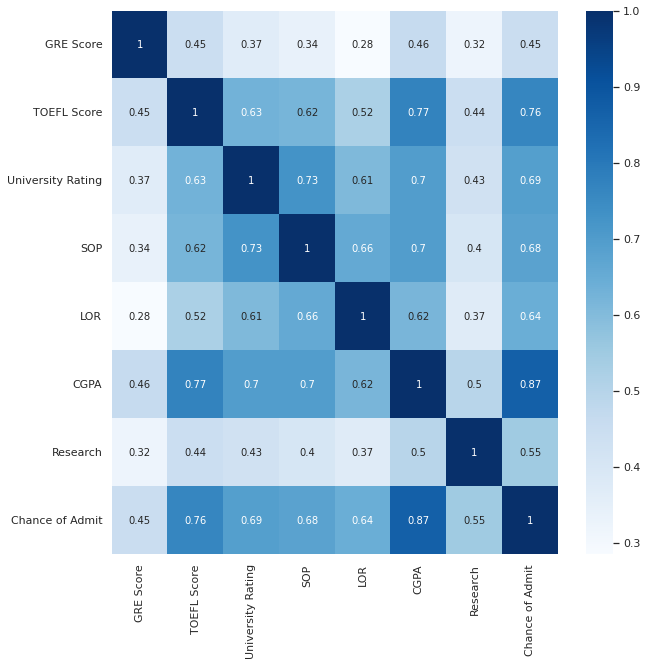

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CGPA vs Chance of Admit')

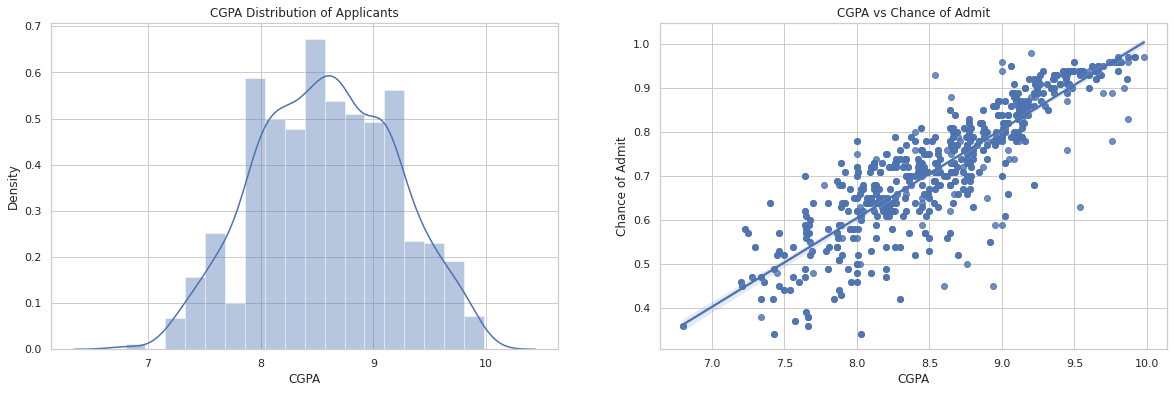

In [7]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

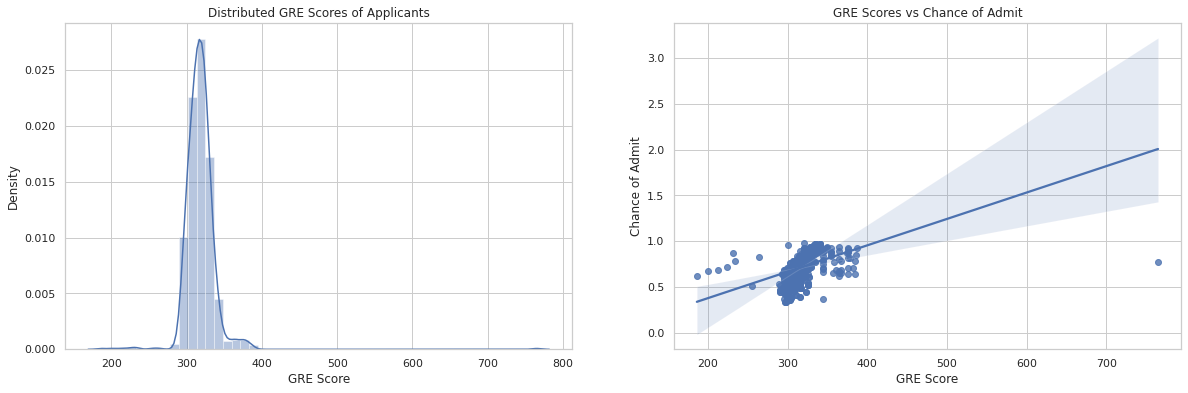

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

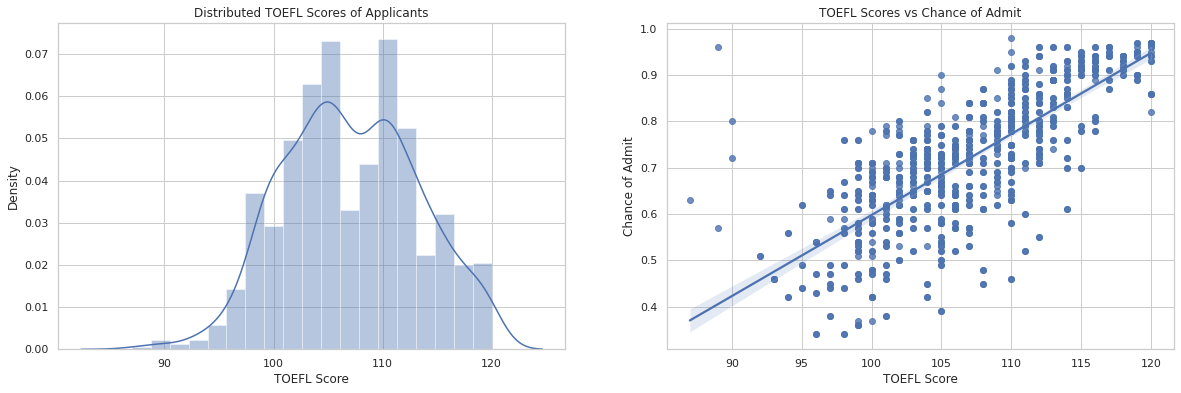

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'No Research Experience'), Text(0, 0, 'Has Research Experience')]

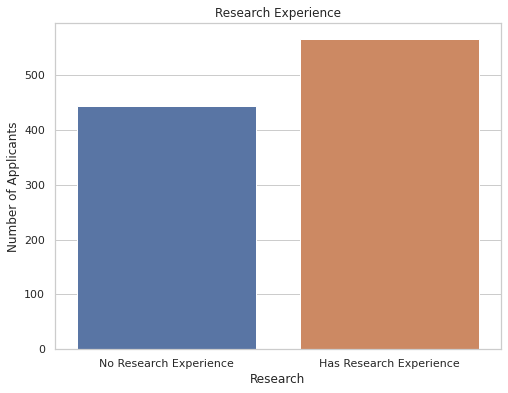

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Applicants')

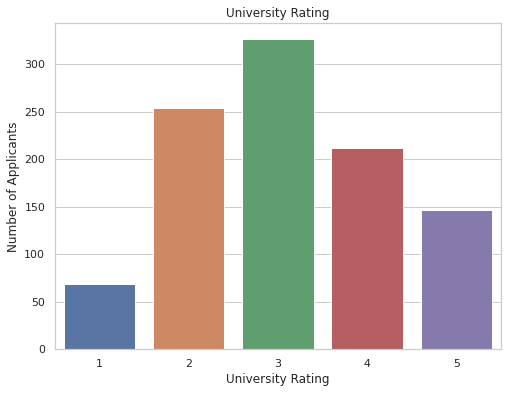

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

In [12]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict = linreg.predict(X_test)
linreg_score = (linreg.score(X_test, y_test))*100
linreg_score

78.82421345549324

In [15]:
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train)
y_predict = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test))*100
dec_tree_score

71.94066645172398

In [16]:
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100
forest_score

81.59221394176967

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Accuracy')

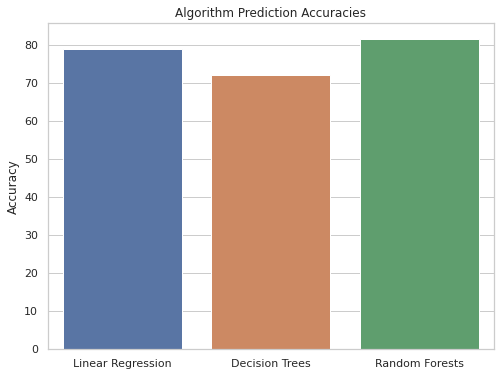

In [24]:
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([linreg_score, dec_tree_score, forest_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')